In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
df = pd.read_csv('/home/leticia/Downloads/archive/customer_booking.csv', encoding='latin-1')

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
#df.describe()

In [6]:
df.shape

(50000, 14)

In [7]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

# Analise Exploratória

In [8]:
# Contar o número de ocorrências de cada tipo de viagem
trip_type_counts = df['trip_type'].value_counts()

print(trip_type_counts)


trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64


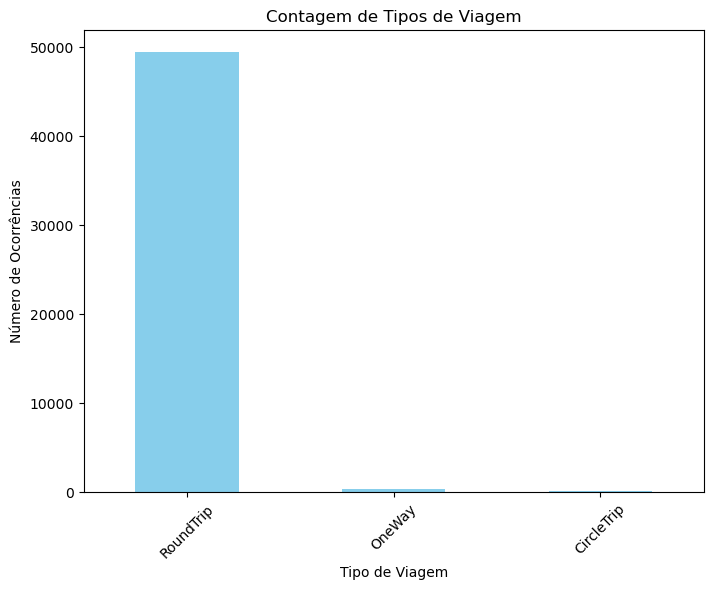

In [9]:
# Plotar um gráfico de barras para mostrar a contagem de tipos de viagem
plt.figure(figsize=(8, 6))
trip_type_counts.plot(kind='bar', color='skyblue')
plt.title('Contagem de Tipos de Viagem')
plt.xlabel('Tipo de Viagem')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.show()

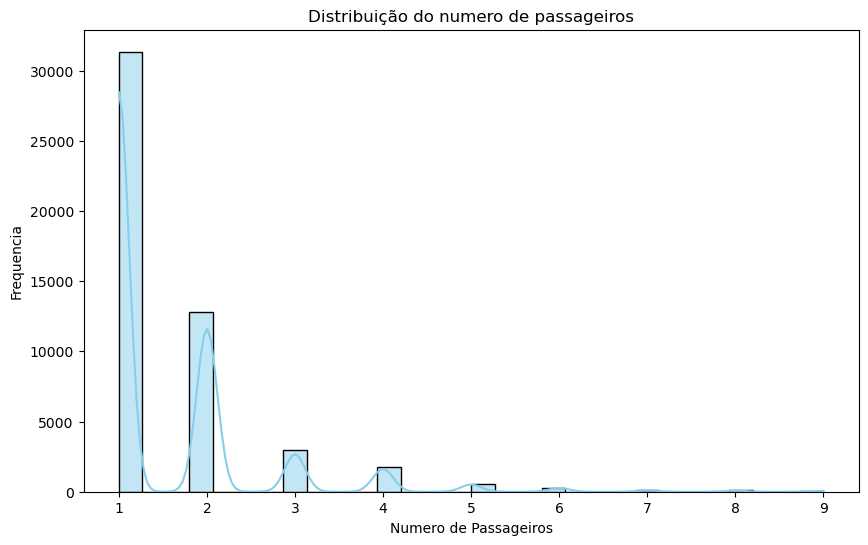

In [10]:
# Distribuição do numero de passageiros
plt.figure(figsize=(10, 6))
sns.histplot(df['num_passengers'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição do numero de passageiros')
plt.xlabel('Numero de Passageiros')
plt.ylabel('Frequencia')
plt.show()

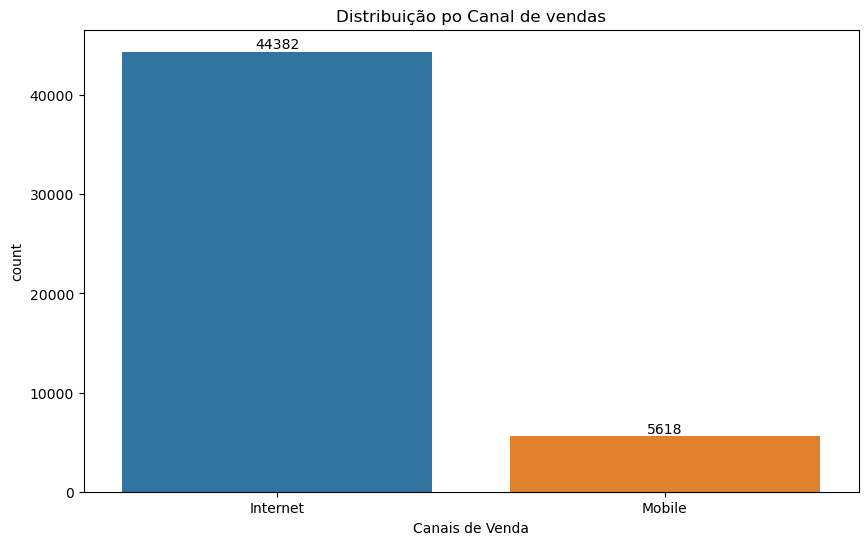

In [11]:
# Distribuição de vendas por canal - onde vende mais passagens
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sales_channel', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 5), 
                 textcoords = 'offset points')

plt.title('Distribuição po Canal de vendas')
plt.xlabel('Canais de Venda')
plt.show()

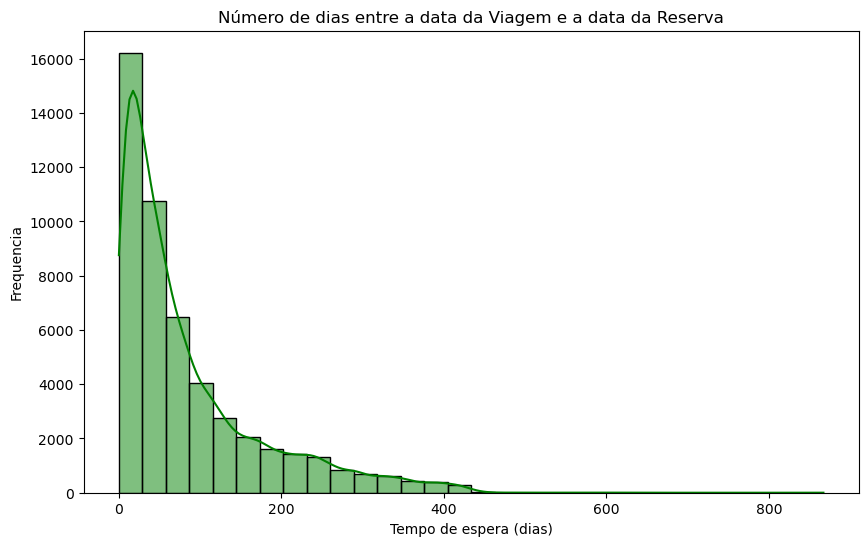

In [12]:
# Distribuição número de dias entre a data da viagem e a data da reserva
plt.figure(figsize=(10, 6))
sns.histplot(df['purchase_lead'], bins=30, kde=True, color='green')
plt.title('Número de dias entre a data da Viagem e a data da Reserva')
plt.xlabel('Tempo de espera (dias)')
plt.ylabel('Frequencia')
plt.show()

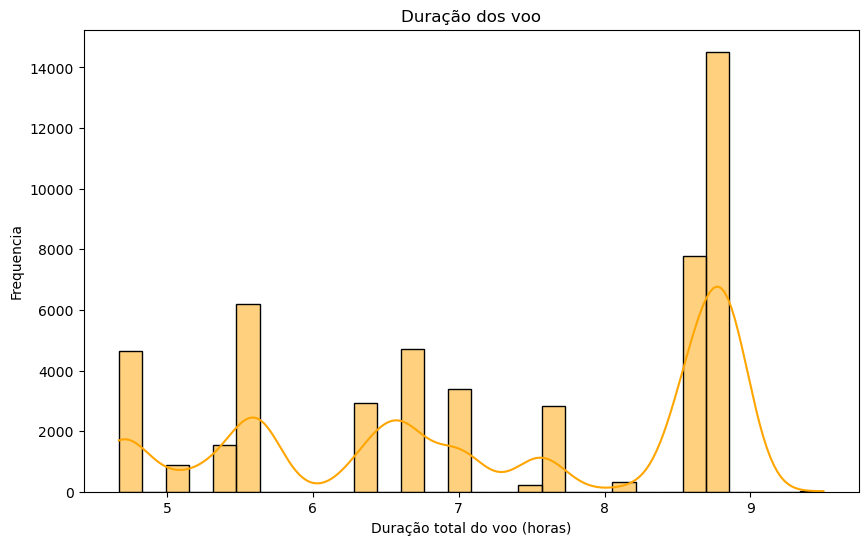

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['flight_duration'], bins=30, kde=True, color='orange')
plt.title('Duração dos voo')
plt.xlabel('Duração total do voo (horas)')
plt.ylabel('Frequencia')
plt.show()

flight_day
Sábado           5812
Domingo          6554
Sexta-feira      6761
Quinta-feira     7424
Terça-feira      7673
Quarta-feira     7674
Segunda-feira    8102
Name: count, dtype: int64


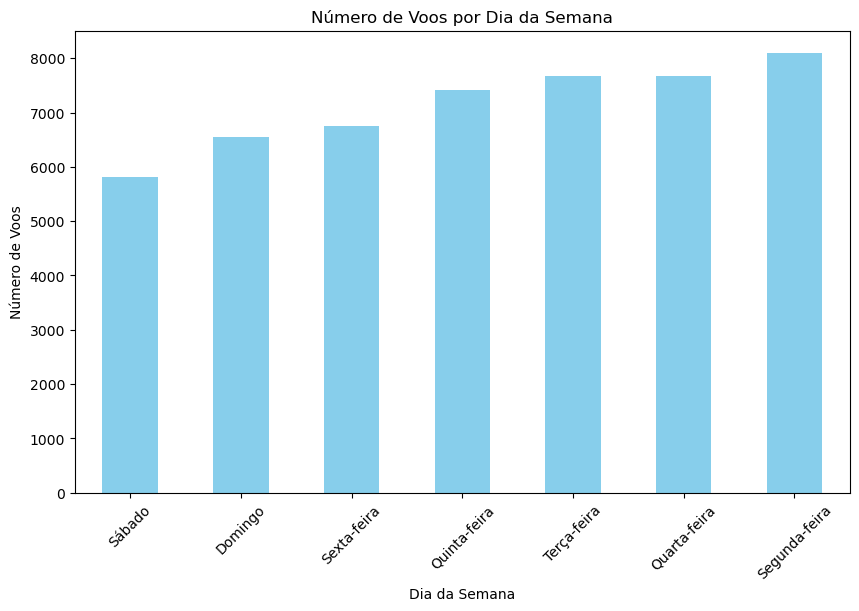

In [14]:
# Dicionário para mapear abreviações para nomes completos dos dias da semana
dia_semana = {
    'Mon': 'Segunda-feira',
    'Tue': 'Terça-feira',
    'Wed': 'Quarta-feira',
    'Thu': 'Quinta-feira',
    'Fri': 'Sexta-feira',
    'Sat': 'Sábado',
    'Sun': 'Domingo'
}

# Aplicar o mapeamento para converter as abreviações em nomes completos
df['flight_day'] = df['flight_day'].map(dia_semana)

# Contagem do número de voos por dia da semana
voos_dia = df['flight_day'].value_counts()

# Ordena os resultados por número de voos 
voos_ordenado = voos_dia.sort_values(ascending=True)
print(voos_ordenado)

# Plotar um gráfico de barras para mostrar a contagem de voos por dia da semana (ordenado)
plt.figure(figsize=(10, 6))
voos_ordenado.plot(kind='bar', color='skyblue')
plt.title('Número de Voos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Voos')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()


route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
Name: count, dtype: int64


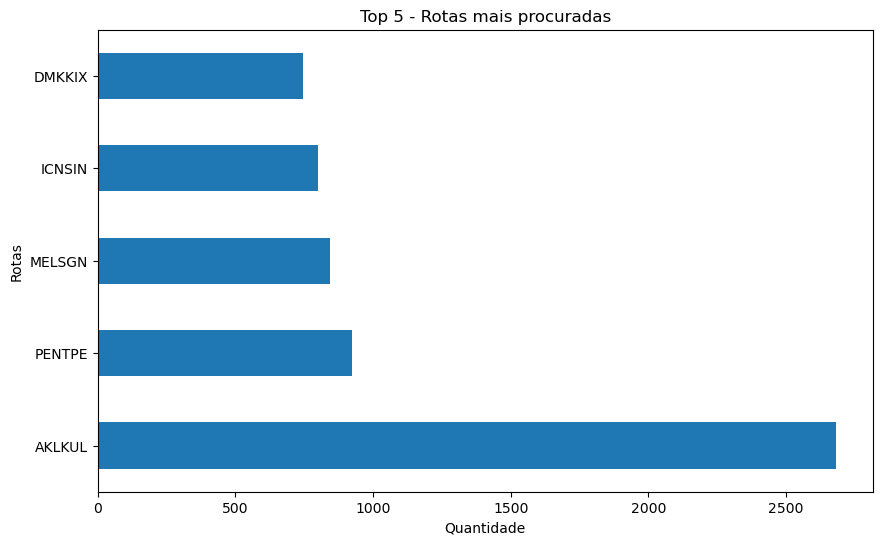

In [15]:
#rotas de viagem mais procuradas
rotas = df['route'].value_counts()

top_rotas = rotas.head(5)
print(top_rotas)

plt.figure(figsize=(10,6))
top_rotas.plot(kind='barh')
plt.title('Top 5 - Rotas mais procuradas')
plt.xlabel('Quantidade')
plt.ylabel('Rotas')
plt.show()

booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Name: count, dtype: int64


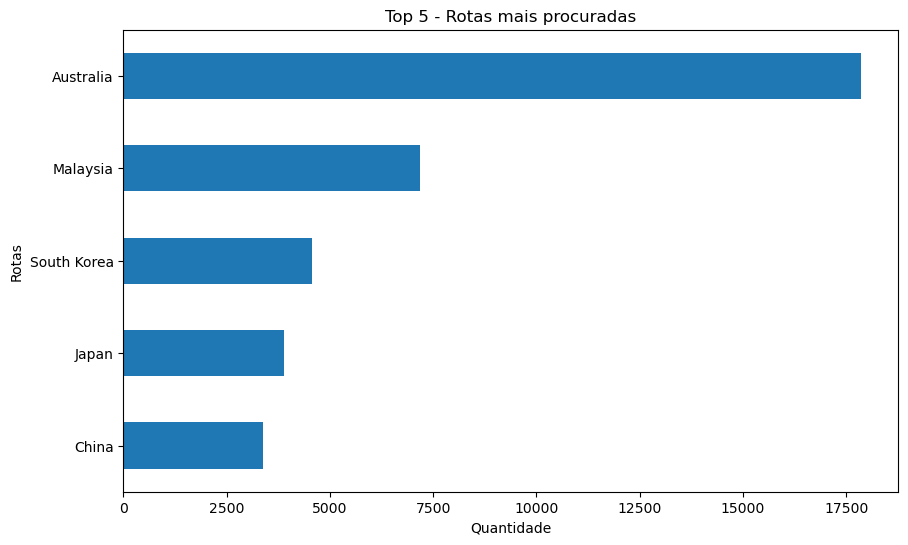

In [16]:
#qual país mais reserva viagens
pais = df['booking_origin'].value_counts()

top_pais = pais.head(5)
print(top_pais)

pais_ordenado = top_pais.sort_values(ascending=True)

plt.figure(figsize=(10,6))
pais_ordenado.plot(kind='barh')
plt.title('Top 5 - Rotas mais procuradas')
plt.xlabel('Quantidade')
plt.ylabel('Rotas')
plt.show()

# Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder_sales_channel = LabelEncoder()
encoder_trip_type = LabelEncoder()
encoder_flight_day = LabelEncoder()
encoder_route = LabelEncoder()
encoder_booking_origin = LabelEncoder()

In [19]:
df['sales_channel'] = encoder_sales_channel.fit_transform(df['sales_channel'])
df['trip_type'] = encoder_trip_type.fit_transform(df['trip_type'])
df['flight_day'] = encoder_flight_day.fit_transform(df['flight_day'])
df['route'] = encoder_route.fit_transform(df['route'])
df['booking_origin'] = encoder_booking_origin.fit_transform(df['booking_origin'])

# Divisao entre previsores e target

In [20]:
X = df.drop(['num_passengers'], axis=1)
y = df['num_passengers']

In [21]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

# Previsão de demanda

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Criar e treinar o modelo
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=0)
regressor_rf.fit(X_treino, y_treino)

# Fazer previsões
previsao_rf = regressor_rf.predict(X_teste)

# Avaliar o modelo
mae_rf = mean_absolute_error(y_teste, previsao_rf)
print("Random Forest - MAE:", mae_rf)

Random Forest - MAE: 0.6608403885521885


In [23]:
# Exemplo com XGBoost
import xgboost as xgb

regressor_xgb = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=0)
regressor_xgb.fit(X_treino, y_treino)

previsao_xgb = regressor_xgb.predict(X_teste)
mae_xgb = mean_absolute_error(y_teste, previsao_xgb)
print("XGBoost - MAE:", mae_xgb)

XGBoost - MAE: 0.6363348552167416


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Exemplo de rede neural simples com Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_treino.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Camada de saída para regressão
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento da rede neural
model.fit(X_treino, y_treino, epochs=50, batch_size=32, validation_split=0.2)

# Avaliação do modelo
previsao_nn = model.predict(X_teste)
mae_nn = mean_absolute_error(y_teste, previsao_nn)
print("Rede Neural - MAE:", mae_nn)

2024-04-30 18:32:37.471241: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 18:32:37.475981: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 18:32:37.559168: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 18:32:38.619788: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/leticia/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(

Epoch 1/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 29.9545 - val_loss: 1.2846
Epoch 2/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3377 - val_loss: 1.2988
Epoch 3/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3070 - val_loss: 1.0898
Epoch 4/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3048 - val_loss: 1.2749
Epoch 5/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3162 - val_loss: 1.1370
Epoch 6/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3107 - val_loss: 1.0602
Epoch 7/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2465 - val_loss: 1.2404
Epoch 8/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1588 - val_loss: 1.0712
Epoch 9/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0705 - val_loss: 1.0813
Epoch 10/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1572 - val_loss: 1.0425
Epoch 11/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0471 - val_loss: 1.0555
Epoch 12/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

In [25]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor  # Exemplo com MLPRegressor (rede neural)

# Definir o número de folds (geralmente entre 5 e 10)
num_folds = 5

# Criar o objeto KFold para dividir os dados
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Inicializar uma lista para armazenar os resultados de desempenho em cada fold
scores = []

# Loop sobre os folds
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Dividir os dados em conjuntos de treino e validação para este fold
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
    
    # Inicializar e treinar o modelo (exemplo com MLPRegressor)
    model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)
    model.fit(X_train_fold, y_train_fold)
    
    # Fazer previsões no conjunto de validação e calcular o MAE
    y_pred_val = model.predict(X_val_fold)
    fold_score = mean_absolute_error(y_val_fold, y_pred_val)
    scores.append(fold_score)
    
    print(f"MAE para o fold {fold_idx + 1}: {fold_score}")

# Calcular a média dos scores de validação cruzada
mean_score = sum(scores) / len(scores)
print(f"MAE médio da validação cruzada: {mean_score}")


Fold 1/5
MAE para o fold 1: 0.6622286038095566
Fold 2/5
MAE para o fold 2: 0.6493068164488488
Fold 3/5
MAE para o fold 3: 0.69145130724271
Fold 4/5
MAE para o fold 4: 0.7890276942734176
Fold 5/5
MAE para o fold 5: 0.6765297250771823
MAE médio da validação cruzada: 0.693708829370343


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Definir os parâmetros que deseja otimizar
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Tamanhos das camadas ocultas
    'activation': ['relu', 'tanh'],  # Função de ativação
    'alpha': [0.0001, 0.001, 0.01]  # Parâmetro de regularização
}

# Inicializar o modelo (exemplo com MLPRegressor)
model = MLPRegressor(random_state=42)

# Inicializar o objeto GridSearchCV com o modelo, parâmetros e método de validação cruzada
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=5, verbose=1)

# Executar a busca em grade com validação cruzada
grid_search.fit(X, y)

# Mostrar os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Calcular o MAE médio usando os melhores hiperparâmetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
mae = mean_absolute_error(y, y_pred)
print("MAE usando os melhores hiperparâmetros:", mae)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/leticia/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leticia/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leticia/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50)}
MAE usando os melhores hiperparâmetros: 0.6394637163452124


In [27]:
# Usar o melhor modelo para fazer previsões em novos dados
y_pred = best_model.predict(X_teste)

# Calcular o MAE para as previsões no conjunto de teste
mae_test = mean_absolute_error(y_teste, y_pred)
print("MAE no conjunto de teste usando o melhor modelo:", mae_test)


MAE no conjunto de teste usando o melhor modelo: 0.6411110764766135


# Visualização

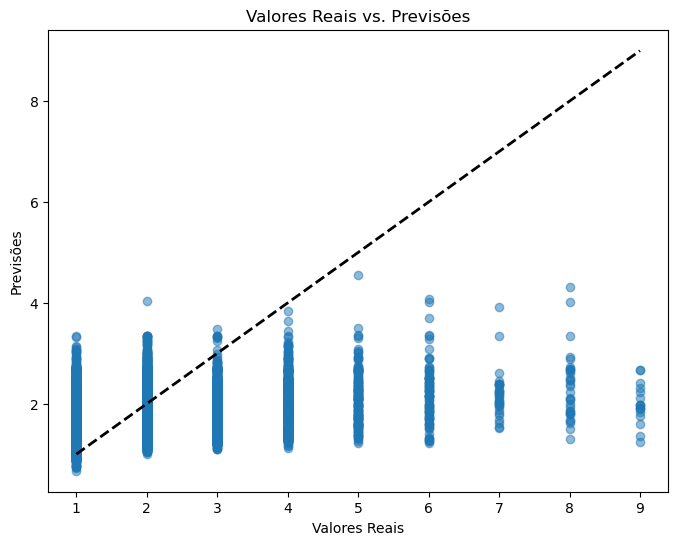

In [28]:
# Plotar um gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(y_teste, y_pred, alpha=0.5)  # Valores reais vs. previsões
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2)  # Linha diagonal (identidade)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.show()


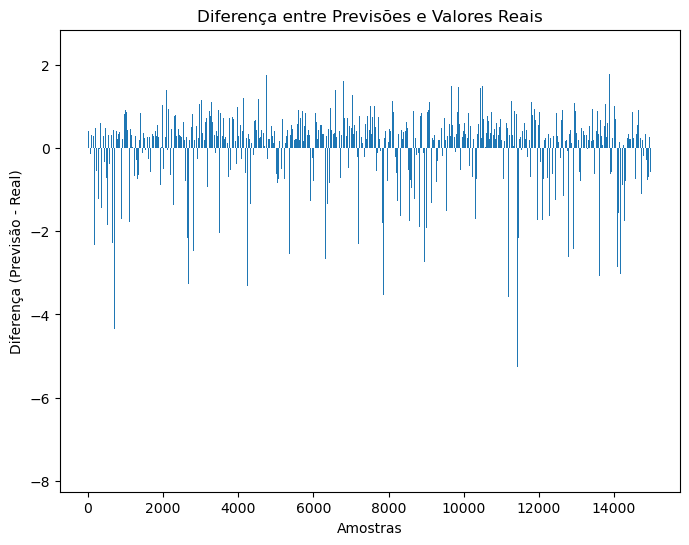

In [29]:
# Calcular as diferenças entre os valores reais e as previsões
diferencas = y_pred - y_teste

# Plotar um gráfico de barras das diferenças
plt.figure(figsize=(8, 6))
plt.bar(range(len(diferencas)), diferencas)
plt.xlabel('Amostras')
plt.ylabel('Diferença (Previsão - Real)')
plt.title('Diferença entre Previsões e Valores Reais')
plt.show()


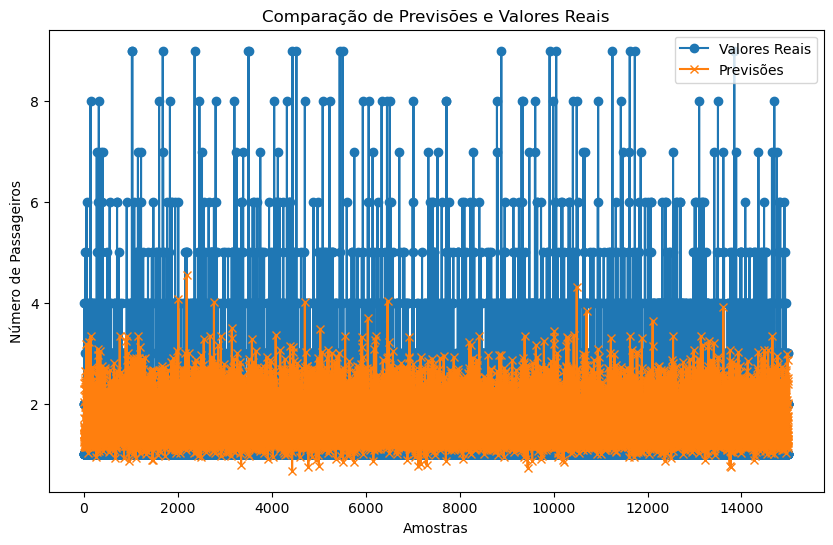

In [30]:
# Plotar um gráfico de linha para comparar previsões e valores reais ao longo do tempo (ou índices)
plt.figure(figsize=(10, 6))
plt.plot(y_teste.values, label='Valores Reais', marker='o')
plt.plot(y_pred, label='Previsões', marker='x')
plt.xlabel('Amostras')
plt.ylabel('Número de Passageiros')
plt.title('Comparação de Previsões e Valores Reais')
plt.legend()
plt.show()
